In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from umap import UMAP
from scipy.stats import pearsonr, spearmanr
import seaborn as sns


In [2]:
import sys
sys.path.insert(0, "..") 

In [3]:
%pwd

'/Users/yvesgreatti/github/MutaPLM/notebook'

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from src.utils import to_float_array

In [6]:
df = pd.read_csv("../output/data/mutaplm_structural_split_train_with_embeddings.csv")
df["protein1_embedding"] = df["protein1_embedding"].apply(to_float_array)
df["protein2_embedding"] = df["protein2_embedding"].apply(to_float_array)
df.head()   

,entry,protein2,uniprot_description,rank,protein1,protein_name,function,GPT_description,all_description,cosine_similarity,protein1_embedding,protein2_embedding
0,B2GUB3-K139E,MAHHTAVNPDRLKHAKALVEKAIKQKKIFAIHGPYPVIRSCLRSRG...,Decreased monoglycylation activity.,NaN,MAHHTAVNPDRLKHAKALVEKAIKQKKIFAIHGPYPVIRSCLRSRG...,Tubulin tyrosine ligase 3,Monoglycylase which modifies alpha- and beta-t...,The site specificity of TTLL enzymes and their...,Decreased monoglycylation activity. The site s...,0.988558,"[-1.8921852, -0.86292756, -2.1020129]","[-1.8120193, -1.1507101, -1.9766926]"
1,Q9V3Z1-K266R,MDNSSGQNSRTASSASTSKIVNYSSPVSPGVAAATSSSSSSSSSGM...,No effect on mitosis. Embryos display an early...,NaN,MDNSSGQNSRTASSASTSKIVNYSSPVSPGVAAATSSSSSSSSSGM...,Tribbles,Adapter protein that negatively regulates diff...,NaN,No effect on mitosis. Embryos display an early...,0.997215,"[-2.0168672, -1.2927542, 0.3857059]","[-2.1092737, -1.280886, 0.34898674]"
2,Q16643-G10R,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,NaN,-1.0,MAGVSFSGHGLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,Drebrin,Actin cytoskeleton-organizing protein that pla...,Gain of binding to ZMYND8. Gain of ZMYND8 cyto...,Gain of binding to ZMYND8. Gain of ZMYND8 cyto...,0.976903,"[-2.842506, 0.88390434, -0.08718419]","[-2.8888497, 0.6144852, -0.16408375]"
3,P08622-A44E,MAKQDYYEILGVSKTAEEREIRKAYKRLAMKYHPDRNQGDKEAEAK...,NaN,-1.0,MAKQDYYEILGVSKTAEEREIRKAYKRLAMKYHPDRNQGDKEAAAK...,Chaperone protein DnaJ,Interacts with DnaK and GrpE to disassemble a ...,Enhances effect. The mutation in the DnaJ prot...,Enhances effect. The mutation in the DnaJ prot...,0.993242,"[-0.05731053, -2.1428442, 0.7616999]","[-0.21728641, -2.333156, 0.6232971]"
4,Q0D2I5-A487R,MNPLFGPNLFLLQQEQQGLAGPLGDSLGGDHFAGGGDLPPAPLSPA...,Loss of interaction with XRCC4; when associate...,NaN,MNPLFGPNLFLLQQEQQGLAGPLGDSLGGDHFAGGGDLPPAPLSPA...,Non-homologous end joining factor IFFO1,Nuclear matrix protein involved in the immobil...,NaN,Loss of interaction with XRCC4; when associate...,0.980813,"[-4.163801, 0.75804734, 1.2863619]","[-4.1141915, 0.7034559, 1.8508923]"


In [13]:
df.shape

(2000, 12)

In [14]:
df.columns

Index(['entry', 'protein2', 'uniprot_description', 'rank', 'protein1',
       'protein_name', 'function', 'GPT_description', 'all_description',
       'cosine_similarity', 'protein1_embedding', 'protein2_embedding'],
      dtype='object')

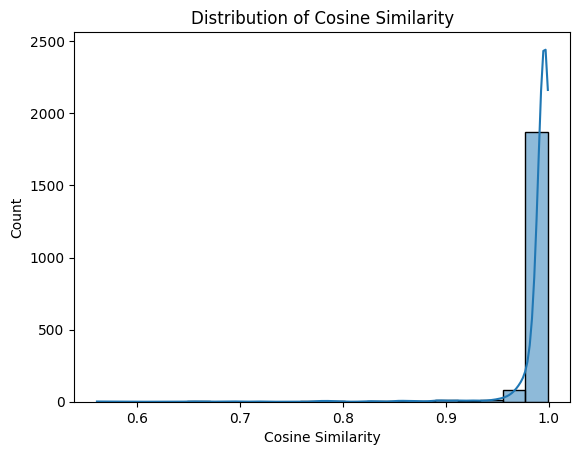

In [15]:
sns.histplot(df["cosine_similarity"], bins=20, kde=True)
plt.title("Distribution of Cosine Similarity")
plt.xlabel("Cosine Similarity")
plt.ylabel("Count")
plt.show()
    

In [16]:
df.dtypes

entry                   object
protein2                object
uniprot_description     object
rank                   float64
protein1                object
protein_name            object
function                object
GPT_description         object
all_description         object
cosine_similarity      float64
protein1_embedding      object
protein2_embedding      object
dtype: object

In [19]:
df.iloc[0, 9]

0.9885584712028505

In [20]:
# Step 1: Combine both sets of embeddings row-wise
protein1_embs = np.vstack(df["protein1_embedding"])
protein2_embs = np.vstack(df["protein2_embedding"])

# Step 2: Stack all embeddings vertically
all_embeddings = np.vstack([protein1_embs, protein2_embs])

In [21]:
# Stack protein1 and protein2 embeddings horizontally per row
combined_embeddings = np.hstack([protein1_embs, protein2_embs])  # shape: (2000, 640)

# Run t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_coords = tsne.fit_transform(combined_embeddings)  # shape: (2000, 2)


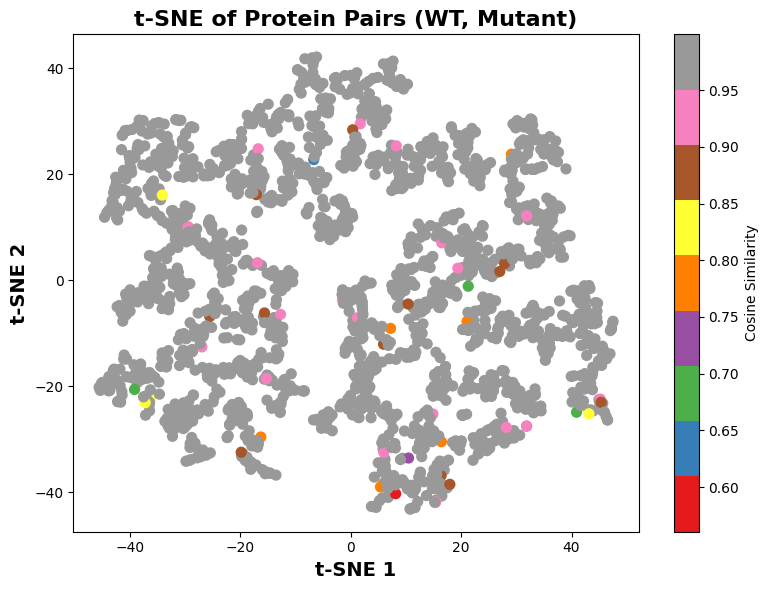

In [22]:
fig = plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    tsne_coords[:, 0],
    tsne_coords[:, 1],
    c=df["cosine_similarity"],
    cmap="Set1",
    s=50
)
plt.colorbar(scatter, label="Cosine Similarity")
plt.title("t-SNE of Protein Pairs (WT, Mutant)",fontsize=16, weight='bold')
plt.xlabel("t-SNE 1", fontsize=14, weight='bold')
plt.ylabel("t-SNE 2", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()
fig.savefig("../output/figure/2000_tsne_wt_mutant_cos.tiff", dpi=300)
plt.close()


In [24]:
# Embed each protein individually
protein1_embeddings = []
protein2_embeddings = []

for _, row in df.iterrows():
    try:
        emb1 = row["protein1_embedding"]
        emb2 = row["protein2_embedding"]
        protein1_embeddings.append(emb1)
        protein2_embeddings.append(emb2)
    except Exception as e:
        print("Embedding error:", e)

# Stack all embeddings (wild-type first, then mutant)
all_embeddings = np.vstack([protein1_embeddings, protein2_embeddings])


In [25]:
# Run t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_coords = tsne.fit_transform(all_embeddings)

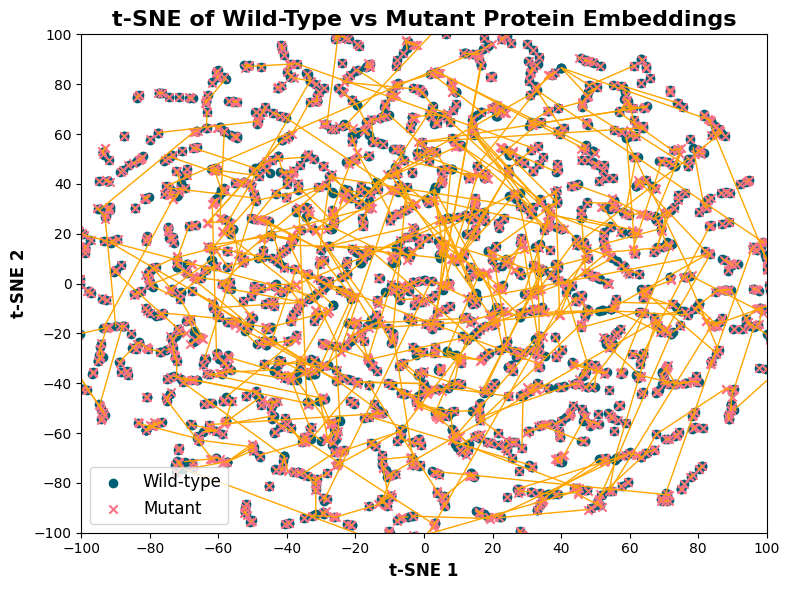

In [26]:

# Separate back into wild-type and mutant coords
n = len(protein1_embeddings)
pt1_coords = tsne_coords[:n]
pt2_coords = tsne_coords[n:]

# Plotting
fig = plt.figure(figsize=(8, 6))
plt.title("t-SNE of Wild-Type vs Mutant Protein Embeddings", fontsize=16, weight='bold')

# Orange connection lines between each pair
for i in range(n):
    plt.plot([pt1_coords[i, 0], pt2_coords[i, 0]], [pt1_coords[i, 1], pt2_coords[i, 1]], c='orange', lw=1)


# Wild-type points (circles)
plt.scatter(pt1_coords[:, 0], pt1_coords[:, 1], c="#005f73", marker="o", label="Wild-type")

# Mutant points (crosses)
plt.scatter(pt2_coords[:, 0], pt2_coords[:, 1], c="#fb7185", marker="x", label="Mutant")

# Custom x/y axis limits and ticks
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.xticks(np.arange(-100, 101, 20))
plt.yticks(np.arange(-100, 101, 20))

plt.xlabel("t-SNE 1", fontsize=12, fontweight='bold')
plt.ylabel("t-SNE 2", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Save as high-quality figure
fig.savefig("../output/figure/2000_tsne_wt_mutant.tiff", dpi=300)
plt.close()

In [27]:
umap_coords = UMAP(n_components=2, random_state=42).fit_transform(all_embeddings)


/Users/yvesgreatti/.pyenv/versions/3.11.9/envs/mutaplm/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


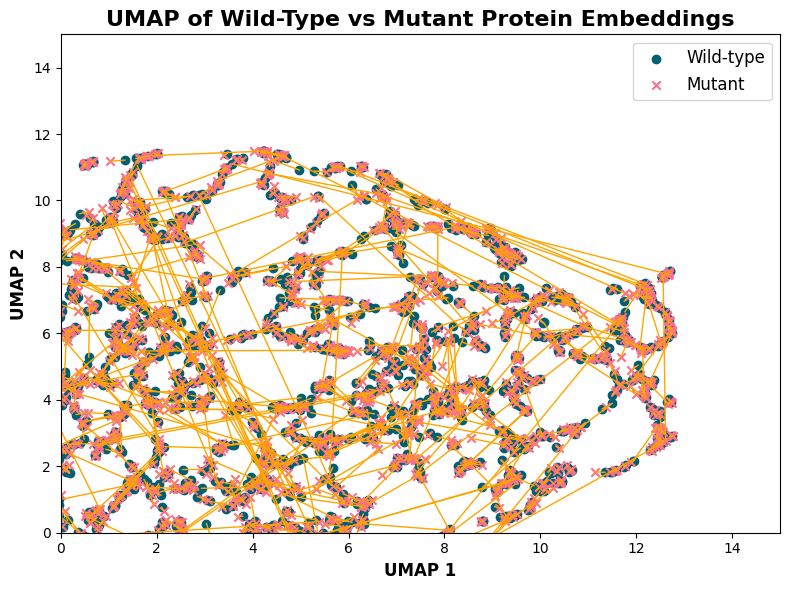

In [28]:
# Separate back into wild-type and mutant coords
n = len(protein1_embeddings)
pt1_coords = umap_coords[:n]
pt2_coords = umap_coords[n:]

# Plotting
fig = plt.figure(figsize=(8, 6))
plt.title("UMAP of Wild-Type vs Mutant Protein Embeddings", fontsize=16, weight='bold')

# Orange connection lines between each pair
for i in range(n):
    plt.plot([pt1_coords[i, 0], pt2_coords[i, 0]], [pt1_coords[i, 1], pt2_coords[i, 1]], c='orange', lw=1)


# Wild-type points (circles)
plt.scatter(pt1_coords[:, 0], pt1_coords[:, 1], c="#005f73", marker="o", label="Wild-type")

# Mutant points (crosses)
plt.scatter(pt2_coords[:, 0], pt2_coords[:, 1], c="#fb7185", marker="x", label="Mutant")

# Custom x/y axis limits and ticks
plt.xlim(0, 15)
plt.ylim(0, 15)
#plt.xticks(np.arange(-60, 61, 10))
#plt.yticks(np.arange(-50, 51, 10))

plt.xlabel("UMAP 1", fontsize=12, fontweight='bold')
plt.ylabel("UMAP 2", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
fig.savefig("../output/figure/2000_umap_wt_mutant.tiff", dpi=300)
plt.close()


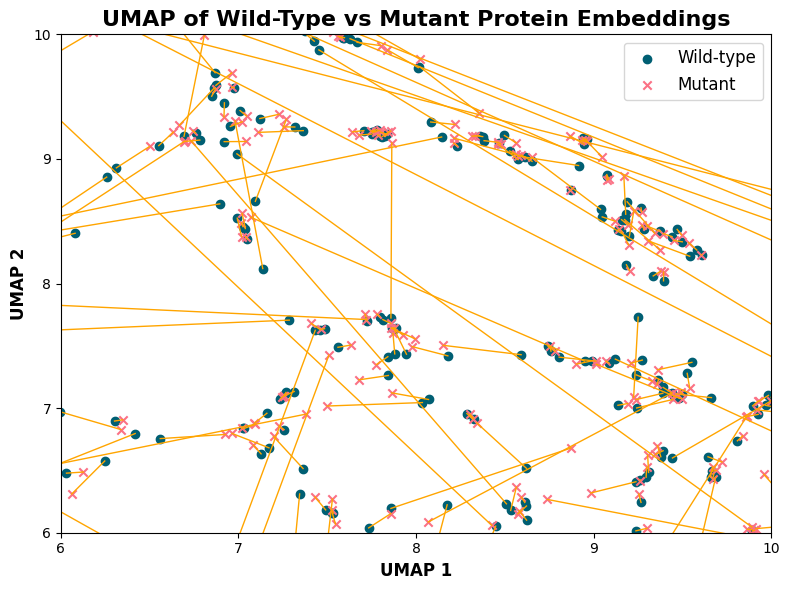

In [29]:

# Plotting
fig = plt.figure(figsize=(8, 6))
plt.title("UMAP of Wild-Type vs Mutant Protein Embeddings", fontsize=16, weight='bold')

# Orange connection lines between each pair
for i in range(n):
    plt.plot([pt1_coords[i, 0], pt2_coords[i, 0]], [pt1_coords[i, 1], pt2_coords[i, 1]], c='orange', lw=1)


# Wild-type points (circles)
plt.scatter(pt1_coords[:, 0], pt1_coords[:, 1], c="#005f73", marker="o", label="Wild-type")

# Mutant points (crosses)
plt.scatter(pt2_coords[:, 0], pt2_coords[:, 1], c="#fb7185", marker="x", label="Mutant")

# Custom x/y axis limits and ticks
plt.xlim(6, 10)
plt.ylim(6, 10)
plt.xticks(np.arange(6, 11, 1))
plt.yticks(np.arange(6, 11, 1))

plt.xlabel("UMAP 1", fontsize=12, fontweight='bold')
plt.ylabel("UMAP 2", fontsize=12, fontweight='bold')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
fig.savefig("../output/figure/2000_umap_zoomed_wt_mutant.tiff", dpi=300)
plt.close()


In [7]:
df2 = pd.read_csv("../output/data/esm2_structural_split_train_with_embeddings.csv")
df2["protein1_embedding"] = df2["protein1_embedding"].apply(to_float_array)
df2["protein2_embedding"] = df2["protein2_embedding"].apply(to_float_array)
df2.head()   

,entry,protein2,uniprot_description,rank,protein1,protein_name,function,GPT_description,all_description,protein1_embedding,protein2_embedding,cosine_similarity
0,B2GUB3-K139E,MAHHTAVNPDRLKHAKALVEKAIKQKKIFAIHGPYPVIRSCLRSRG...,Decreased monoglycylation activity.,NaN,MAHHTAVNPDRLKHAKALVEKAIKQKKIFAIHGPYPVIRSCLRSRG...,Tubulin tyrosine ligase 3,Monoglycylase which modifies alpha- and beta-t...,The site specificity of TTLL enzymes and their...,Decreased monoglycylation activity. The site s...,"[-0.00676873, -0.169605672, 0.0815060213, 0.08...","[-0.00462564733, -0.168973312, 0.080742605, 0....",0.999991
1,Q9V3Z1-K266R,MDNSSGQNSRTASSASTSKIVNYSSPVSPGVAAATSSSSSSSSSGM...,No effect on mitosis. Embryos display an early...,NaN,MDNSSGQNSRTASSASTSKIVNYSSPVSPGVAAATSSSSSSSSSGM...,Tribbles,Adapter protein that negatively regulates diff...,NaN,No effect on mitosis. Embryos display an early...,"[0.0227191467, -0.151268065, 0.116504923, 0.04...","[0.0234031882, -0.152165294, 0.114847869, 0.04...",0.999988
2,Q16643-G10R,MAGVSFSGHRLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,NaN,-1.0,MAGVSFSGHGLELLAAYEEVIREESAADWALYTYEDGSDDLKLAAS...,Drebrin,Actin cytoskeleton-organizing protein that pla...,Gain of binding to ZMYND8. Gain of ZMYND8 cyto...,Gain of binding to ZMYND8. Gain of ZMYND8 cyto...,"[-0.0561641455, -0.0730362087, 0.0150626265, 0...","[-0.0574310161, -0.0724767596, 0.0140832532, 0...",0.999980
3,P08622-A44E,MAKQDYYEILGVSKTAEEREIRKAYKRLAMKYHPDRNQGDKEAEAK...,NaN,-1.0,MAKQDYYEILGVSKTAEEREIRKAYKRLAMKYHPDRNQGDKEAAAK...,Chaperone protein DnaJ,Interacts with DnaK and GrpE to disassemble a ...,Enhances effect. The mutation in the DnaJ prot...,Enhances effect. The mutation in the DnaJ prot...,"[-0.208028138, 0.0362938307, 0.0693338811, 0.0...","[-0.207400307, 0.0394168682, 0.0727231428, 0.1...",0.999959
4,Q0D2I5-A487R,MNPLFGPNLFLLQQEQQGLAGPLGDSLGGDHFAGGGDLPPAPLSPA...,Loss of interaction with XRCC4; when associate...,NaN,MNPLFGPNLFLLQQEQQGLAGPLGDSLGGDHFAGGGDLPPAPLSPA...,Non-homologous end joining factor IFFO1,Nuclear matrix protein involved in the immobil...,NaN,Loss of interaction with XRCC4; when associate...,"[-0.0352694727, -0.146516681, -0.00648949854, ...","[-0.0408831239, -0.149988025, -0.00550699839, ...",0.999946


In [8]:
df.rename(columns={"protein1_embedding": "mutapl_protein1_embedding", 
                   "protein2_embedding": "mutapl_protein2_embedding",
                   "cosine_similarity": "mutapl_cosine_similarity"}, inplace=True)
df2.rename(columns={"protein1_embedding": "esm2_protein1_embedding", 
                    "protein2_embedding": "esm2_protein2_embedding",
                    "cosine_similarity": "esm2_cosine_similarity"}, inplace=True)


In [9]:
df = df[["entry","protein1", "protein2", "mutapl_protein1_embedding", "mutapl_protein2_embedding", "mutapl_cosine_similarity"]]
df2 = df2[["entry","protein1", "protein2", "esm2_protein1_embedding", "esm2_protein2_embedding", "esm2_cosine_similarity"]]


In [10]:
df3 = pd.merge(df, df2, on=["entry", "protein1", "protein2"])


In [11]:
df3.columns

Index(['entry', 'protein1', 'protein2', 'mutapl_protein1_embedding',
       'mutapl_protein2_embedding', 'mutapl_cosine_similarity',
       'esm2_protein1_embedding', 'esm2_protein2_embedding',
       'esm2_cosine_similarity'],
      dtype='object')

In [12]:
df3.shape

(2000, 9)

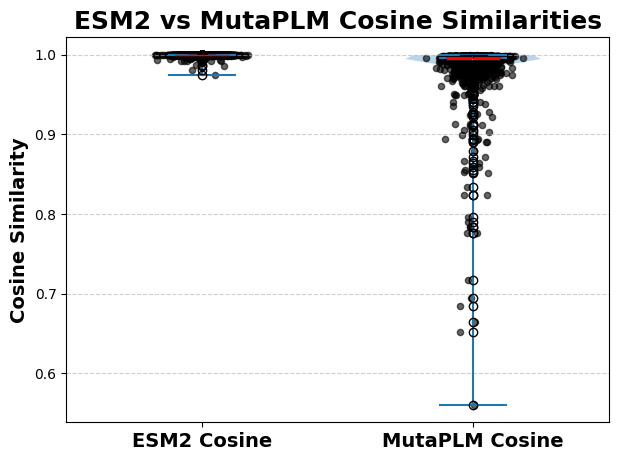

In [15]:
data = [
    df3["esm2_cosine_similarity"].astype(float),
    df3["mutapl_cosine_similarity"].astype(float)
]
fig = plt.figure(figsize=(7, 5))


# Create violin plot
parts = plt.violinplot(data, showmeans=False, showmedians=True)

# Overlay a boxplot on top
plt.boxplot(
    data,
    positions=[1, 2],
    widths=0.2,
    patch_artist=True,
    boxprops=dict(facecolor="lightgray", alpha=0.4),
    medianprops=dict(color="red"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)

# Overlay the actual data points (jittered)
for i, vals in enumerate(data, start=1):
    x_jitter = np.random.normal(loc=i, scale=0.05, size=len(vals))
    plt.scatter(x_jitter, vals, alpha=0.6, s=20, color="black")

# X-axis and labels
plt.xticks([1, 2], ["ESM2 Cosine", "MutaPLM Cosine"], fontsize=14, fontweight='bold')
plt.ylabel("Cosine Similarity", fontsize=14, fontweight='bold')
plt.title("ESM2 vs MutaPLM Cosine Similarities", fontsize=18, fontweight='bold')
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()
fig.savefig("../output/figure/wt_mut_cos_boxplot.tiff", dpi=300)
plt.close()



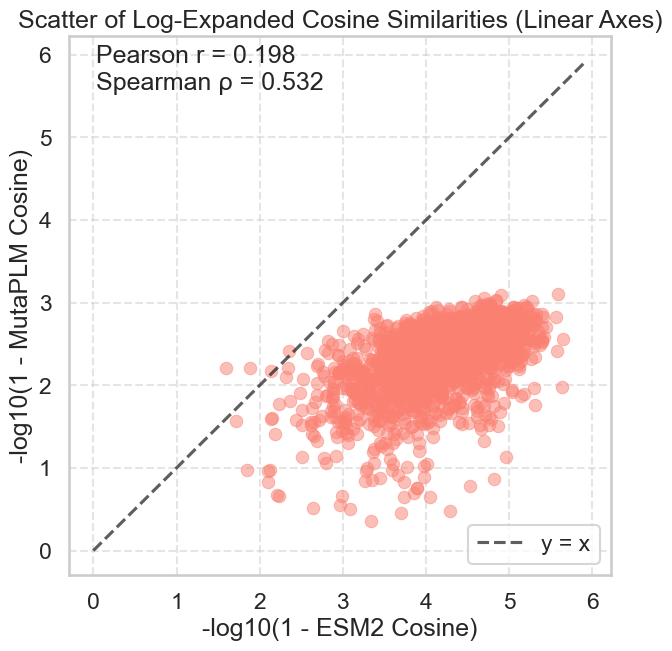

In [ ]:

# Original cosine similarities
x = df3["esm2_cosine_similarity"]
y = df3["mutapl_cosine_similarity"]

# Log-transform values to expand differences near 1
x_log = -np.log10(1 - x)
y_log = -np.log10(1 - y)

# Compute correlations on original scale
pearson_corr, _ = pearsonr(x, y)
spearman_corr, _ = spearmanr(x, y)

sns.set_theme(style="whitegrid", context="talk")
plt.figure(figsize=(7,7))

# Scatter plot with Seaborn
sns.scatterplot(x=x_log, y=y_log, alpha=0.5, color="salmon", edgecolor=None)

# Reference line y=x
max_val = max(x_log.max(), y_log.max()) * 1.05
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.7, label="y = x")

# Annotate Pearson and Spearman
plt.text(0.05, 0.95, f"Pearson r = {pearson_corr:.3f}", transform=plt.gca().transAxes)
plt.text(0.05, 0.90, f"Spearman ρ = {spearman_corr:.3f}", transform=plt.gca().transAxes)

# Labels and title
plt.xlabel("-log10(1 - ESM2 Cosine)")
plt.ylabel("-log10(1 - MutaPLM Cosine)")
plt.title("Scatter of Log-Expanded Cosine Similarities (Linear Axes)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_19132/3813522569.py:7: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x, y, c="#fb7185", marker="x", alpha=0.6, edgecolors="k")
/var/folders/w3/d06m5l_97yn4bnxd5t6cgbjr0000gn/T/ipykernel_19132/3813522569.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


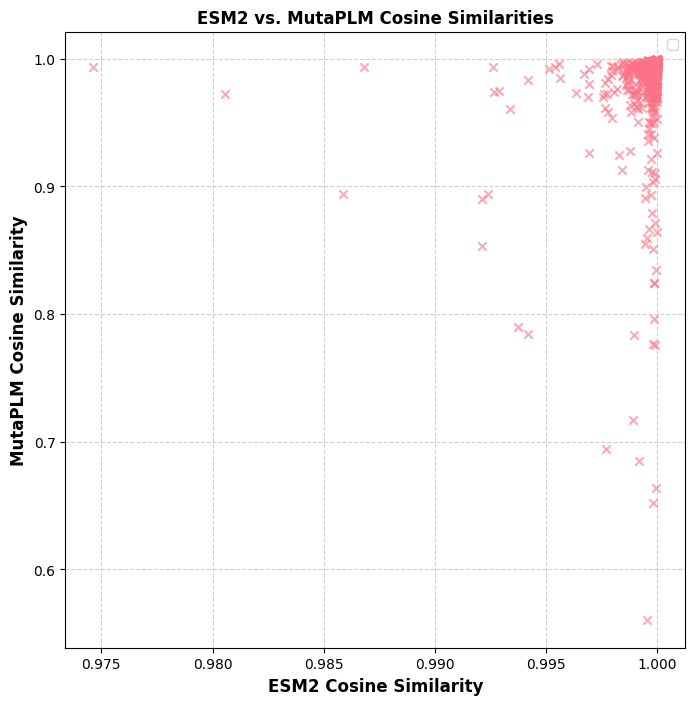

In [83]:
plt.figure(figsize=(8, 8))

x = df3["esm2_cosine_similarity"]
y = df3["mutapl_cosine_similarity"]

# Scatter plot
plt.scatter(x, y, c="#fb7185", marker="x", alpha=0.6, edgecolors="k")


# Add y=x line for reference
#plt.plot([0, 1], [0, 1], 'r--', label="y=x")

# Labels and title
plt.xlabel("ESM2 Cosine Similarity", fontsize=12, fontweight='bold')
plt.ylabel("MutaPLM Cosine Similarity", fontsize=12, fontweight='bold')
plt.title("ESM2 vs. MutaPLM Cosine Similarities", fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

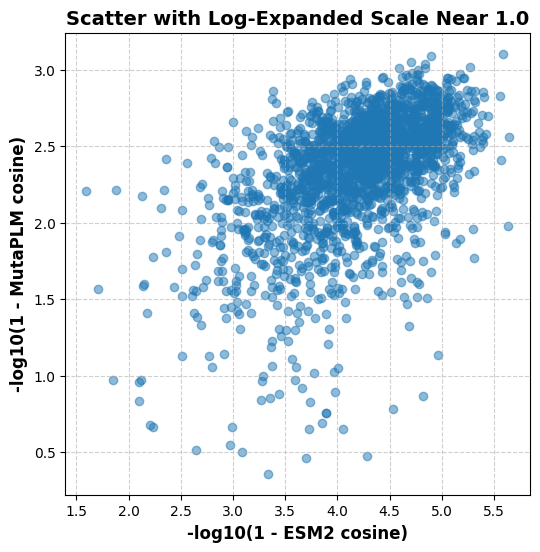

In [16]:

x = df3["esm2_cosine_similarity"].values
y = df3["mutapl_cosine_similarity"].values

x_log = -np.log10(1 - x)
y_log = -np.log10(1 - y)

fig = plt.figure(figsize=(6,6))
plt.scatter(x_log, y_log, alpha=0.5)
plt.xlabel("-log10(1 - ESM2 cosine)", fontsize=12, fontweight='bold')
plt.ylabel("-log10(1 - MutaPLM cosine)", fontsize=12, fontweight='bold')
plt.title("Scatter with Log-Expanded Scale Near 1.0", fontsize=14, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
fig.savefig("../output/figure/wt_mut_cos_scatterplot.tiff", dpi=300)
plt.close()



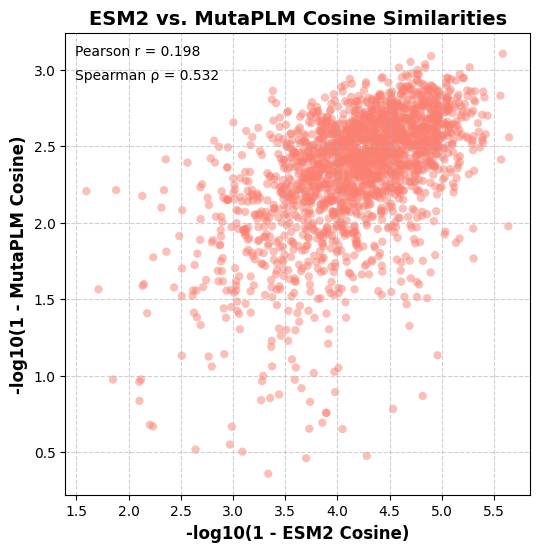

In [23]:


# Use the same x and y from the df
x = df3["esm2_cosine_similarity"]
y = df3["mutapl_cosine_similarity"]

# Apply log-transform near 1 to expand high similarities
x_log = -np.log10(1 - x)
y_log = -np.log10(1 - y)

# Compute correlations on the original scale or log scale?
# Here we show both to be clear
pearson_corr, _ = pearsonr(x, y)
spearman_corr, _ = spearmanr(x, y)

fig = plt.figure(figsize=(6, 6))
plt.scatter(x_log, y_log, alpha=0.5, color="salmon", edgecolors="none")

# Annotate correlations (from original scale)
plt.text(0.02, 0.95, f"Pearson r = {pearson_corr:.3f}", transform=plt.gca().transAxes)
plt.text(0.02, 0.90, f"Spearman ρ = {spearman_corr:.3f}", transform=plt.gca().transAxes)

plt.xlabel("-log10(1 - ESM2 Cosine)", fontsize=12, fontweight='bold')
plt.ylabel("-log10(1 - MutaPLM Cosine)", fontsize=12, fontweight='bold')
plt.title("ESM2 vs. MutaPLM Cosine Similarities", fontsize=14, fontweight='bold')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
fig.savefig("../output/figure/wt_mut_cos_scatterplot.tiff", dpi=300)
plt.close()
